In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist["data"], mnist["target"]

In [3]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# TEST AND COMPARE

In [5]:
some_digit = X[3]
some_digit_image = some_digit.reshape(28, 28)

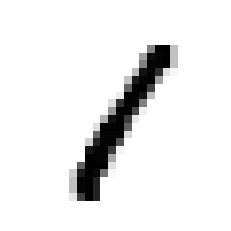

In [6]:
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [7]:
y[3]

'1'

In [8]:
# Convert to numeric
y = y.astype(np.uint8)

In [9]:
#The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000 images):
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
# 1-digit detector for testing
y_train_1 = (y_train == 1)
y_test_1 = (y_test == 1)

# Stochastic Gradient Descent (SGD) classifier

In [11]:
from sklearn.linear_model import SGDClassifier

#SGDClassifier relies on randomness during training
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_1)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

# Measuring Accuracy

## Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_1, cv=3, scoring="accuracy")

array([0.98440078, 0.9908    , 0.98924946])

## Confusion Matrix

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3)

In [15]:
confusion_matrix(y_train_1, y_train_pred)

array([[52857,   401],
       [  310,  6432]], dtype=int64)

In [16]:
y_train_perfect_predictions = y_train_1
confusion_matrix(y_train_1, y_train_perfect_predictions)

array([[53258,     0],
       [    0,  6742]], dtype=int64)

## Precision and Recall

In [17]:
from sklearn.metrics import precision_score, recall_score

In [18]:
# Correct 94.13% all the time
precision_score(y_train_1, y_train_pred)

0.9413142104492902

In [19]:
# can detect 95.4% 1-digit
recall_score(y_train_1, y_train_pred)

0.9540195787600119

In [23]:
6432 / (6432 + 401) # From Confusion Matrix

0.9413142104492902

In [22]:
6432 / (6432 + 310) # From Confusion Matrix

0.9540195787600119

# f1_score

In [24]:
from sklearn.metrics import f1_score
f1_score(y_train_1, y_train_pred)

0.9476243093922653

In [ ]:
# Result similar to Precision and Recall

# Precision/Recall Trade-off

In [25]:
from sklearn.metrics import precision_recall_curve

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([9449.95787804])

In [27]:
# Find threshold
y_scores = cross_val_predict(sgd_clf, X_train, y_train_1, cv=3, method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train_1, y_scores)

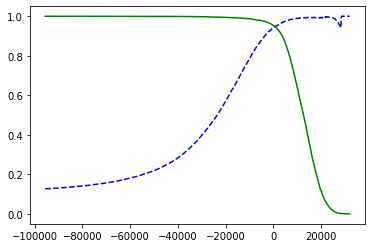

In [31]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

In [36]:
threshold=0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False, False, False, ..., False, False, False])

In [37]:
threshold_98_precision = thresholds[np.argmax(precisions >= 0.98)]
y_train_pred_98 = (y_scores >= threshold_98_precision)

In [38]:
precision_score(y_train_1, y_train_pred_98)

0.9800924280127977

In [39]:
recall_score(y_train_1, y_train_pred_98)

0.8178582023138534

In [ ]:
# It's trade-off

# The receiver operating characteristic (ROC Curve)

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train_1, y_scores)  

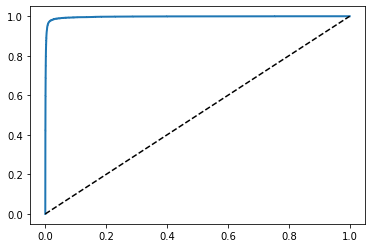

In [41]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    [...]

plot_roc_curve(fpr, tpr, 'Roc curve plot')
plt.show()

In [42]:
roc_auc_score(y_train_1, y_scores)

0.9967127746598257

# Compare

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_1, cv=3, method="predict_proba")

D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Software\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [44]:
y_scores_forest = y_probas_forest[:, 1]

#function expects labels and scores, but instead of scores you can give class probabilities
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_1, y_scores_forest)

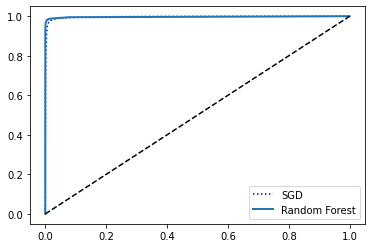

In [45]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [46]:
roc_auc_score(y_train_1, y_scores_forest)

0.9968169993950629